In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from get_weather_data import getWeatherData

In [2]:
from get_aq_data import get_flo_data, ID_to_name

In [3]:
data, hourly_mean, daily_mean = get_flo_data()

In [12]:
all_site_daily_mean = daily_mean.mean(axis=1)

In [20]:
all_site_daily_max = data.resample('1D').max().mean(axis=1)

In [24]:
all_site_daily_desc = data.mean(axis=1)
all_site_daily_desc = all_site_daily_desc.resample('1D').agg(['min', 'max', 'mean', 'median'])

In [27]:
weather = getWeatherData('ISOUTHAM4', 1, 1, 2019, 'year')

http://www.wunderground.com/weatherstation/WXDailyHistory.asp?ID=ISOUTHAM4&day=1&month=1&year=2019&graphspan=year&format=1


In [28]:
weather.index = pd.DatetimeIndex(weather.Date)

In [29]:
merged = pd.merge(all_site_daily_desc, weather, left_index=True, right_index=True)

In [30]:
merged.columns

Index(['min', 'max', 'mean', 'median', 'Date', 'TemperatureHighC',
       'TemperatureAvgC', 'TemperatureLowC', 'DewpointHighC', 'DewpointAvgC',
       'DewpointLowC', 'HumidityHigh', 'HumidityAvg', 'HumidityLow',
       'PressureMaxhPa', 'PressureMinhPa', 'WindSpeedMaxKMH',
       'WindSpeedAvgKMH', 'GustSpeedMaxKMH', 'PrecipitationSumCM', 'station'],
      dtype='object')

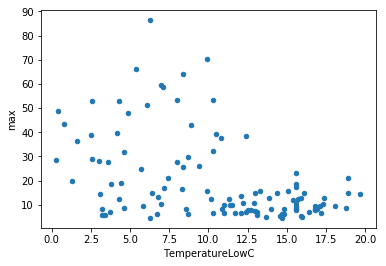

In [31]:
merged.plot(x='TemperatureLowC', y='max', kind='scatter')

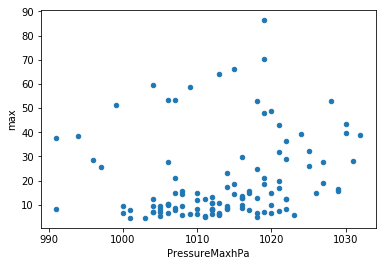

In [33]:
merged.plot(x='PressureMaxhPa', y='max', kind='scatter')

In [39]:
merged.corr()['max'].abs().sort_values()

TemperatureLowC      -0.452949
DewpointLowC         -0.452492
DewpointAvgC         -0.435169
DewpointHighC        -0.390751
TemperatureAvgC      -0.339073
WindSpeedMaxKMH      -0.233952
TemperatureHighC     -0.189622
PrecipitationSumCM   -0.176034
GustSpeedMaxKMH      -0.173946
HumidityLow          -0.169688
HumidityAvg          -0.162058
WindSpeedAvgKMH      -0.110398
HumidityHigh          0.094580
PressureMaxhPa        0.184414
PressureMinhPa        0.203793
min                   0.726049
median                0.868985
mean                  0.921071
max                   1.000000
Name: max, dtype: float64